**Classification Based Recommender System**

This model is based on using supervised machine learning algorithms.We calculate accuracy and then choose our champion model. 
Based on the results, we do predictions with the testing labels and analyse the outputs.

**The algorithms used are:**

1. Support Vector Machine
2. K-nearest neighbour
3. Decision Tree




In [ ]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

Upload the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving attraction_new.csv to attraction_new.csv


Get the columns from dataset that you need

In [ ]:
df_attractions = pd.read_csv('attraction_new.csv', sep=',', encoding='latin-1', usecols=['location_id','location_name','location_type', 'type_id','ratings', 'no. of rating', 'provience', 'cost', 'user_id', 'best_time_to_visit', 'visiting_hours', 'Address', 'Website_link', 'image_link'])
print(df_attractions.shape)
df_attractions.head(5)

(60, 14)


,location_id,location_name,location_type,type_id,ratings,no. of rating,provience,cost,user_id,best_time_to_visit,visiting_hours,Address,Website_link,image_link
0,0,Ripley's Aquarium of Canada,Aquariums,4,4.5,"20,326",ontario,15$,1,summer,Sun - Sat 10:00 AM - 8:00 PM,"288 Bremner Boulevard, Toronto, Ontario M5V 3L...",http://www.ripleyaquariums.com/canada,https://dynamic-media-cdn.tripadvisor.com/medi...
1,1,Mount Royal Park,Parks,2,3.0,"10,493",quebec,5$,1,fall,Sun - Sat 6:00 AM - 12:00 AM,"1260 Remembrance Road, Montreal, Quebec H3H 1A...",http://www.lemontroyal.qc.ca/en,https://dynamic-media-cdn.tripadvisor.com/medi...
2,2,Stanley Park,Parks,2,4.5,"28,722",BC,free,1,all time,Sun-Sat 8:00 AM- 6:00 PM,"Stanley Park Causeway, Vancouver, British Colu...",http://vancouver.ca/parks-recreation-culture/s...,https://dynamic-media-cdn.tripadvisor.com/medi...
3,3,Niagara Falls Canada,Points of Interest & Landmarks Waterfalls,4,1.0,"31,476",ontario,free,2,all time,Thu - Thu 12:00 AM - 11:59 PM,"Niagara Falls, Ontario L2G 3Y9 Canada",https://www.niagarafallstourism.com/,https://dynamic-media-cdn.tripadvisor.com/medi...
4,4,Old Quebec,Neighbourhoods Historic Walking Areas,5,5.0,"13,360",quebec,10$,2,summer,Sun - Sat 10:00 AM - 8:00 PM,"Rue de Tresor, Quebec City, Quebec GIR 5B8 Canada",http://whc.unesco.org/en/list/300,https://dynamic-media-cdn.tripadvisor.com/medi...


**Classification on the basis of User Id using SVM, KNN and Decision Tree**



----


Clean the data by removing punctuations

In [ ]:
import re   
def get_clean_text(data):
    cleaned=[]
    for book in data:
        single_lower= re.sub(r'\s+',' ',book).lower() # Multiple space removal and conevrt to lower case
        clean_text = re.sub('[^a-zA-Z]',' ', single_lower)
        cleaned.append(clean_text)
    return cleaned

In [ ]:
cleaned=get_clean_text(df_attractions['location_name'])
print(cleaned)

df_clean=pd.DataFrame({'Names':cleaned})
df_clean.head()

['ripley s aquarium of canada', 'mount royal park', 'stanley park', 'niagara falls canada', 'old quebec', 'heritage park historical village', 'parliament hill and buildings', 'royal bc museum', 'banff gondola', 'toronto island park', 'lake ontario', 'west edmonton mall', 'peller estates winery', 'whistler blackcomb', 'canadian museum for human rights', 'halifax waterfront boardwalk', 'myra canyon park', 'port credit', 'lost lake', 'the calgary zoo', 'dundurn castle', 'old montreal', 'notre dame basilica', 'le petit train du nord bike path', 'capilano suspension bridge park', 'kinsol trestle', 'springbank park', 'kingston waterfront', 'moraine lake', 'the grotto', 'cn tower', 'athabasca falls', 'maligne lake', 'canmore cave tours', 'signal hill', 'fort edmonton park', 'whistler mountain bike park', 'windsor riverfront', 'canadian war museum', 'vaughan mills', 'icefields parkway', 'pacific rim national park', 'st lawrence market', 'steveston heritage fishing village', 'elk island nationa

,Names
0,ripley s aquarium of canada
1,mount royal park
2,stanley park
3,niagara falls canada
4,old quebec


Remove stopwords

In [ ]:
import nltk

def remove_stopwords(data):
    nltk.download('stopwords')
    stop_words = nltk.corpus.stopwords.words("english")
    splited_text=data.str.split()
    text_no_stopwords=[]
    for i in range(len(splited_text)):
        text_no_stopwords1 = [word for word in splited_text[i] if word not in stop_words]
        text_no_stopwords.append(' '.join(text_no_stopwords1))
    return text_no_stopwords

In [ ]:
a=remove_stopwords(df_clean['Names'])
df_clean['no_stopwords']=a; 
df_clean['User_id']=df_attractions['user_id']
df_clean.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Names,no_stopwords,User_id
0,ripley s aquarium of canada,ripley aquarium canada,1
1,mount royal park,mount royal park,1
2,stanley park,stanley park,1
3,niagara falls canada,niagara falls canada,2
4,old quebec,old quebec,2


Divide data into training and testing data separately

In [ ]:
from sklearn.model_selection import train_test_split
df_attractions_train, df_attractions_test, df_attractions_userId_train, df_attractions_userId_test = train_test_split(
df_clean['Names'],df_clean['User_id'], test_size=0.15, random_state=0)

Use TFiDF to create vectors

In [ ]:
#TFiDF Transformation
# Parameter election
from sklearn.feature_extraction.text import TfidfVectorizer
ngram_range = (1,2); min_df = 10; max_df = 1.
#; max_features = 300
# max_features=max_features
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        norm='l2',
                        sublinear_tf=True)
df_attractions_train_tfidf = tfidf.fit_transform(df_attractions_train).toarray()
print(df_attractions_train_tfidf.shape)
df_attractions_test_tfidf = tfidf.transform(df_attractions_test).toarray()
print(df_attractions_test_tfidf.shape)

(51, 1)
(9, 1)


**We will try three machine learning classification models and compare them to find the best one:**

Support Vector Machine K Nearest Neighbors Decision Tree

The methodology used to train each model is as follows:

At first check what parameters the model has.

Implement the baseline model and measure its accuracy.
Measure the model performance by defining the metric (accuracy).
The best model will be chosen based on testing accuracy.
Analyze the model performance on both training and test data using visualization.

In [ ]:
# First, we can see what hyperparameters the model has:
from sklearn.metrics import  accuracy_score
from sklearn import svm
SVM = svm.SVC()
print('Check the parameters of SVM:\n',SVM.get_params())

Check the parameters of SVM:
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Check the accuracy for SVM

In [ ]:
# Check the accuracy of the SVM base model:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
SVM_base_model = svm.SVC()
SVM_base_model.fit(df_attractions_train_tfidf, df_attractions_userId_train)
SVM_base_model_accur=accuracy_score(df_attractions_userId_test, SVM_base_model.predict(df_attractions_test_tfidf))
print('The accuracy score of SVM_base_model:',SVM_base_model_accur)

The accuracy score of SVM_base_model: 0.2222222222222222


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
print('Check the parameters of KNN:\n',KNN.get_params())

Check the parameters of KNN:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


Check the accuracy for KNN

In [ ]:
KNN_base_model = KNeighborsClassifier()
KNN_base_model.fit(df_attractions_train_tfidf, df_attractions_userId_train)
KNN_base_model_accur=accuracy_score(df_attractions_userId_test, KNN_base_model.predict(df_attractions_test_tfidf))
print('The accuracy score of KNN_base_model:',KNN_base_model_accur)

The accuracy score of KNN_base_model: 0.1111111111111111


Check the accuracy for Decesion Tree

In [ ]:
# DT base model:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

DT_base_model= DecisionTreeClassifier() # Create Decision Tree classifer object
DT_base_model=DT_base_model.fit(df_attractions_train_tfidf, df_attractions_userId_train) # Train Decision Tree Classifer
#Predict the response for test dataset
DT_base_model_pred = DT_base_model.predict(df_attractions_test_tfidf)
DT_base_model_accur=accuracy_score(df_attractions_userId_test, DT_base_model.predict(df_attractions_test_tfidf))
print("Accuracy:",metrics.accuracy_score(df_attractions_userId_test, DT_base_model_pred))

Accuracy: 0.2222222222222222


Choose **SVM** as our champion model and predict the user_id on the basis of the results we get from the algorithm. Then classification report and confusion matrix is used to analyze the model performance on test data.

In [ ]:
SVM_base_model.fit(df_attractions_train_tfidf, df_attractions_userId_train) # fit the SVM model to the training data
predictions = SVM_base_model.predict(df_attractions_test_tfidf)
index_df_attractions_test = df_attractions_test.index
df_test = df_clean.loc[index_df_attractions_test]
# Add the predictions
df_test['Predicted_user_id'] = predictions
df_test = df_test[['Names', 'User_id', 'Predicted_user_id']]
#df_test.drop(columns='labels_encoder',inplace=True)
df_test

,Names,User_id,Predicted_user_id
26,springbank park,1,4
35,fort edmonton park,2,4
59,annapolis valley,5,3
28,moraine lake,1,3
11,west edmonton mall,4,3
2,stanley park,1,4
34,signal hill,2,3
58,neck point park,4,4
40,icefields parkway,3,3


**Classification Report**

In [ ]:
print("\nClassification report of SVM model:\n", classification_report(df_attractions_userId_test,predictions))



Classification report of SVM model:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.20      1.00      0.33         1
           4       0.25      0.50      0.33         2
           5       0.00      0.00      0.00         1

    accuracy                           0.22         9
   macro avg       0.09      0.30      0.13         9
weighted avg       0.08      0.22      0.11         9



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Confusion Matrix**


Confusion Matrix of SVM model:



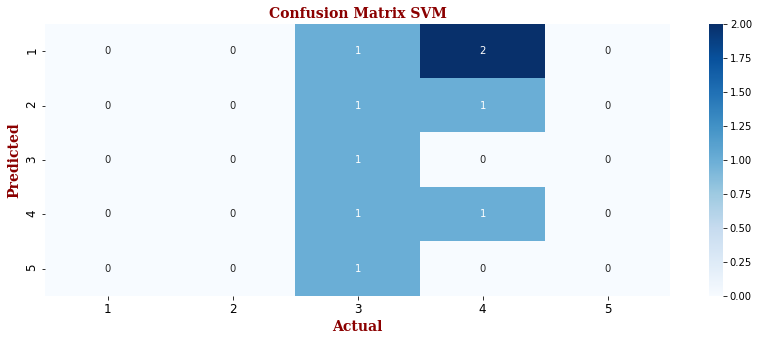

In [ ]:
SVM_df = df_test[['User_id']].drop_duplicates().sort_values('User_id')
font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 14}
SVM_conf_matrix = confusion_matrix(df_attractions_userId_test,predictions)
plt.figure(figsize=(14,5))
sns.heatmap(SVM_conf_matrix, 
            annot=True,
            xticklabels=SVM_df['User_id'].values, 
            yticklabels=SVM_df['User_id'].values,
            cmap="Blues")
plt.ylabel('Predicted',fontdict=font)
plt.xlabel('Actual',fontdict=font)
plt.title('Confusion Matrix SVM',fontdict=font)
plt.xticks(fontsize=12);plt.yticks(fontsize=12)
print("\nConfusion Matrix of SVM model:\n")
plt.show()


**Visualization** of predictions results to compare them easily

In [ ]:
import plotly.express as px

df = px.data.tips()
fig = px.bar(df_test, x="Names", y="User_id", color='Predicted_user_id')
fig.show()

**Classification on the basis of Location Type using SVM, KNN and Decision Tree**


---

In [ ]:
df_clean_type=pd.DataFrame({'Names':df_clean['Names']})
df_clean_type['Location_type']=df_attractions['location_type']
df_clean_type['Actual_type_id']=df_attractions['type_id']
df_clean_type.head()

,Names,Location_type,Actual_type_id
0,ripley s aquarium of canada,Aquariums,4
1,mount royal park,Parks,2
2,stanley park,Parks,2
3,niagara falls canada,Points of Interest & Landmarks Waterfalls,4
4,old quebec,Neighbourhoods Historic Walking Areas,5


Divide data into training and testing data separately

In [ ]:
from sklearn.model_selection import train_test_split
df_attractions_train2, df_attractions_test2, df_attractions_typeId_train, df_attractions_typeId_test = train_test_split(
df_clean_type['Names'],df_clean_type['Actual_type_id'], test_size=0.15, random_state=0)

Convert data into vectors usinf TFiDF

In [ ]:
#TFiDF Transformation
# Parameter election
from sklearn.feature_extraction.text import TfidfVectorizer
ngram_range = (1,2); min_df = 10; max_df = 1.
#; max_features = 300
# max_features=max_features
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        norm='l2',
                        sublinear_tf=True)
df_attractions_train_tfidf = tfidf.fit_transform(df_attractions_train2).toarray()
print(df_attractions_train_tfidf.shape)
df_attractions_test_tfidf = tfidf.transform(df_attractions_test2).toarray()
print(df_attractions_test_tfidf.shape)

(51, 1)
(9, 1)


We will try three machine learning classification models and compare them to find the best one:

Support Vector Machine K Nearest Neighbors Decision Tree

In [ ]:
from sklearn import svm
SVM = svm.SVC()
print('Check the parameters of SVM:\n',SVM.get_params())

Check the parameters of SVM:
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Check the accuracy for SVM

In [ ]:
# Check the accuracy of the SVM base model:
from sklearn import svm
SVM_base_model = svm.SVC()
SVM_base_model.fit(df_attractions_train_tfidf, df_attractions_typeId_train)
SVM_base_model_accur=accuracy_score(df_attractions_typeId_test, SVM_base_model.predict(df_attractions_test_tfidf))
print('The accuracy score of SVM_base_model:',SVM_base_model_accur)

The accuracy score of SVM_base_model: 0.4444444444444444


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
print('Check the parameters of KNN:\n',KNN.get_params())

Check the parameters of KNN:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


Check the accuracy for KNN

In [ ]:
KNN_base_model = KNeighborsClassifier()
KNN_base_model.fit(df_attractions_train_tfidf, df_attractions_typeId_train)
KNN_base_model_accur=accuracy_score(df_attractions_typeId_test, KNN_base_model.predict(df_attractions_test_tfidf))
print('The accuracy score of KNN_base_model:',KNN_base_model_accur)

The accuracy score of KNN_base_model: 0.4444444444444444


Check the accuracy for Decision Tree

In [ ]:
# DT base model:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

DT_base_model= DecisionTreeClassifier() # Create Decision Tree classifer object
DT_base_model=DT_base_model.fit(df_attractions_train_tfidf, df_attractions_typeId_train) # Train Decision Tree Classifer
#Predict the response for test dataset
DT_base_model_pred = DT_base_model.predict(df_attractions_test_tfidf)
DT_base_model_accur=accuracy_score(df_attractions_typeId_test, DT_base_model.predict(df_attractions_test_tfidf))
print("Accuracy:",metrics.accuracy_score(df_attractions_typeId_test, DT_base_model_pred))

Accuracy: 0.4444444444444444


Choose SVM as our champion model and predict the type of location by usinf type_id on the basis of the results we get from the algorithm. Then classification report and confusion matrix is used to analyze the model performance on test data.

In [ ]:
SVM_base_model.fit(df_attractions_train_tfidf, df_attractions_typeId_train) # fit the SVM model to the training data
predictions = SVM_base_model.predict(df_attractions_test_tfidf)
index_df_attractions_test = df_attractions_test2.index
df_test_results = df_clean_type.loc[index_df_attractions_test]
# Add the predictions
df_test_results['Predicted_type_id'] = predictions
df_test_results = df_test_results[['Names', 'Location_type','Actual_type_id', 'Predicted_type_id']]
df_test_results

,Names,Location_type,Actual_type_id,Predicted_type_id
26,springbank park,Nature & Wildlife Areas Parks,2,2
35,fort edmonton park,Historic Sites Amusement & Theme Parks,6,2
59,annapolis valley,Valleys,9,5
28,moraine lake,Bodies of Water,4,5
11,west edmonton mall,Shopping Malls,8,5
2,stanley park,Parks,2,2
34,signal hill,Historic Sites Points of Interest & Landmarks,5,5
58,neck point park,Parks,2,2
40,icefields parkway,Scenic Drives,7,5


**Classification Report for SVM**


In [ ]:
print("\nClassification report of SVM model:\n", classification_report(df_attractions_typeId_test,predictions))



Classification report of SVM model:
               precision    recall  f1-score   support

           2       0.75      1.00      0.86         3
           4       0.00      0.00      0.00         1
           5       0.20      1.00      0.33         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.44         9
   macro avg       0.14      0.29      0.17         9
weighted avg       0.27      0.44      0.32         9



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Confusion Matrix**


Confusion Matrix of SVM model:



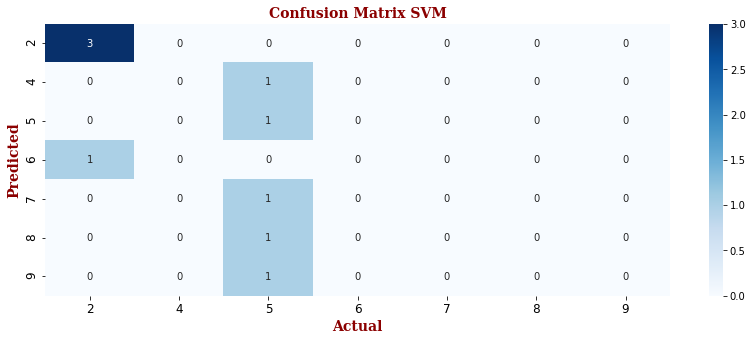

In [ ]:
SVM_df = df_test_results[['Actual_type_id']].drop_duplicates().sort_values('Actual_type_id')
font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 14}
SVM_conf_matrix = confusion_matrix(df_attractions_typeId_test,predictions)
plt.figure(figsize=(14,5))
sns.heatmap(SVM_conf_matrix, 
            annot=True,
            xticklabels=SVM_df['Actual_type_id'].values, 
            yticklabels=SVM_df['Actual_type_id'].values,
            cmap="Blues")
plt.ylabel('Predicted',fontdict=font)
plt.xlabel('Actual',fontdict=font)
plt.title('Confusion Matrix SVM',fontdict=font)
plt.xticks(fontsize=12);plt.yticks(fontsize=12)
print("\nConfusion Matrix of SVM model:\n")
plt.show()


**Visualizarion**

In [ ]:
import plotly.express as px

df = px.data.tips()
fig = px.bar(df_test_results, x="Names", y="Actual_type_id", color='Predicted_type_id')
fig.show()